In [26]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load the Data

In [27]:
df = pd.read_excel("TIESv4-1.xls")

In [28]:
df.head()

,caseid,startmonth,startday,startyear,endmonth,endday,endyear,ongoingasofmonth,ongoingasofday,ongoingasofyear,...,targeteconomiccostsfigure,targeteconomiccostscurrency,targeteconomiccostsyear,sendercosts,sendereconomiccostsfigure,sendereconomiccostscurrency,sendereconomiccostsyear,finaloutcome,settlementnaturesender,settlementnaturetarget
0,1945121601,12.0,16.0,1945,5.0,27.0,1947.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,8.0,2.0,8.0
1,1946020801,2.0,8.0,1946,6.0,19.0,1949.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,10.0,3.0
2,1946031101,3.0,11.0,1946,10.0,9.0,1993.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,10.0,2.0
3,1946040901,4.0,9.0,1946,8.0,3.0,1960.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,5.0,5.0
4,1946051001,5.0,10.0,1946,8.0,9.0,1946.0,NaN,NaN,NaN,...,90000000,dollars,1946.0,1.0,NaN,NaN,NaN,7.0,7.0,3.0


In [29]:
cow = pd.read_csv("COW-country-codes.csv")

In [30]:
cow.head()

,StateAbb,CCode,StateNme
0,USA,2,United States of America
1,CAN,20,Canada
2,BHM,31,Bahamas
3,CUB,40,Cuba
4,CUB,40,Cuba


In [31]:
plty = pd.read_excel("POLITY5-PRC.xlsx")

In [32]:
set(plty['Indicator'])

{'Polity database: Combined Polity Score',
 'Polity database: Competitiveness of Executive Recruitment',
 'Polity database: Executive Constraints (Decision Rules)',
 'Polity database: Executive Constraints Concept',
 'Polity database: Executive Recruitment Concept',
 'Polity database: Institutionalized Autocracy Index',
 'Polity database: Institutionalized Democracy Index',
 'Polity database: Openness of Executive Recruitment',
 'Polity database: Political Competition Concept',
 'Polity database: Regime Durability Index',
 'Polity database: Regulation of Chief Executive Recruitment',
 'Polity database: Regulation of Participation',
 'Polity database: Revised Combined Polity Score (p5)',
 'Polity database: The Competitiveness of Participation'}

In [33]:
autocratic_score = plty[plty['Indicator'] == 'Polity database: Combined Polity Score']
#A third index variable, POLITY, is derived simply by subtracting the AUTOC value from the DEMOC value; this procedure provides a single regime score that ranges from +10 (full democracy) to !10 (full autocracy).

In [34]:
# Ensure year columns are only numeric
year_columns = [col for col in autocratic_score.columns if col.isdigit()]

# Melt the DataFrame to reshape it with 'Year' as a series
melted_df_auto = autocratic_score.melt(id_vars=['Economy Name'], 
                           value_vars=year_columns, 
                           var_name='Year', 
                           value_name='Value')

# Convert 'Year' to integer for sorting or analysis
melted_df_auto['Year'] = melted_df_auto['Year'].astype(int)

# Sort the data
melted_df_auto = melted_df_auto.sort_values(['Economy Name', 'Year'])


In [35]:
melted_df_auto.head()

,Economy Name,Year,Value
0,Afghanistan,1776,NaN
166,Afghanistan,1777,NaN
332,Afghanistan,1778,NaN
498,Afghanistan,1779,NaN
664,Afghanistan,1780,NaN


### Autocracy and Number of Sanctions

   Year  Average_Autocracy_Score
0  1776                    -77.0
1  1777                    -77.0
2  1778                    -77.0
3  1779                    -77.0
4  1780                    -77.0


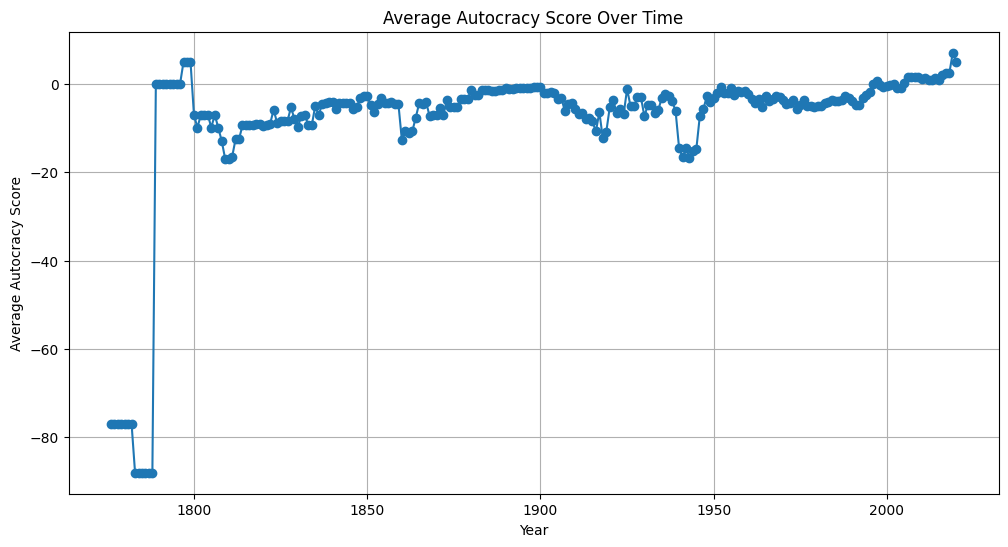

In [36]:
# Step 1: Ensure data types are correct
melted_df_auto['Year'] = pd.to_numeric(melted_df_auto['Year'], errors='coerce')
melted_df_auto = melted_df_auto.dropna(subset=['Year'])
melted_df_auto['Year'] = melted_df_auto['Year'].astype(int)

melted_df_auto['Value'] = pd.to_numeric(melted_df_auto['Value'], errors='coerce')
melted_df_auto = melted_df_auto.dropna(subset=['Value'])

# Step 2: Calculate the average autocracy score over time
average_autocracy_over_time = melted_df_auto.groupby('Year')['Value'].mean().reset_index()
average_autocracy_over_time.rename(columns={'Value': 'Average_Autocracy_Score'}, inplace=True)

# Display the first few rows
print(average_autocracy_over_time.head())

# Step 3: Visualize the average autocracy score over time
plt.figure(figsize=(12, 6))
plt.plot(average_autocracy_over_time['Year'], average_autocracy_over_time['Average_Autocracy_Score'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Autocracy Score')
plt.title('Average Autocracy Score Over Time')
plt.grid(True)
plt.show()

### Merge Autocracy Score

In [ ]:
# Define a function to safely apply string methods
def safe_upper_strip(x):
    if isinstance(x, str):
        return x.upper().strip()
    else:
        return np.nan

# Standardize country names in melted_df_auto
melted_df_auto['Economy_Name_standardized'] = melted_df_auto['Economy Name'].apply(safe_upper_strip)

# Standardize country names in cow
cow['StateNme_standardized'] = cow['StateNme'].apply(safe_upper_strip)

# Remove rows with NaN in the standardized columns
melted_df_auto = melted_df_auto.dropna(subset=['Economy_Name_standardized'])
cow = cow.dropna(subset=['StateNme_standardized'])

# Create a mapping from cow: StateNme_standardized to CCode
country_mapping = dict(zip(cow['StateNme_standardized'], cow['CCode']))

# Map country codes to melted_df_auto
melted_df_auto['Country_Code'] = melted_df_auto['Economy_Name_standardized'].map(country_mapping)

# Remove rows where mapping failed (Country_Code is NaN)
melted_df_auto = melted_df_auto.dropna(subset=['Country_Code'])

# Ensure 'Country_Code' in melted_df_auto is numeric
melted_df_auto['Country_Code'] = melted_df_auto['Country_Code'].astype(int)

In [38]:
# Ensure 'targetstate' in df is numeric
df['Country_Code'] = pd.to_numeric(df['targetstate'], errors='coerce')

# Drop rows with NaN in 'Country_Code'
df = df.dropna(subset=['Country_Code'])

# Convert 'Country_Code' to integer type
df['Country_Code'] = df['Country_Code'].astype(int)


In [39]:
# Convert 'startyear' in df to numeric
df['startyear'] = pd.to_numeric(df['startyear'], errors='coerce')
df = df.dropna(subset=['startyear'])
df['startyear'] = df['startyear'].astype(int)

# Convert 'Year' in melted_df_auto to numeric
melted_df_auto['Year'] = pd.to_numeric(melted_df_auto['Year'], errors='coerce')
melted_df_auto = melted_df_auto.dropna(subset=['Year'])
melted_df_auto['Year'] = melted_df_auto['Year'].astype(int)

# Ensure 'Value' in melted_df_auto is numeric
melted_df_auto['Value'] = pd.to_numeric(melted_df_auto['Value'], errors='coerce')
melted_df_auto = melted_df_auto.dropna(subset=['Value'])


In [40]:
# Merge df with melted_df_auto to get the 'Value' at the time of the sanction
df_with_autocracy = pd.merge(
    df,
    melted_df_auto[['Country_Code', 'Year', 'Value']],
    left_on=['Country_Code', 'startyear'],
    right_on=['Country_Code', 'Year'],
    how='left'
)

# Rename 'Value' column to 'Autocracy_Score' for clarity
df_with_autocracy.rename(columns={'Value': 'Autocracy_Score'}, inplace=True)

# Optionally, drop the 'Year' column from melted_df_auto to avoid confusion
df_with_autocracy.drop(columns=['Year'], inplace=True)


In [41]:
recent_autocratic = df_with_autocracy[(df_with_autocracy["Autocracy_Score"] < 0) & (df_with_autocracy["startyear"] > 1970)]

In [42]:
recent_autocratic.head()

,caseid,startmonth,startday,startyear,endmonth,endday,endyear,ongoingasofmonth,ongoingasofday,ongoingasofyear,...,targeteconomiccostsyear,sendercosts,sendereconomiccostsfigure,sendereconomiccostscurrency,sendereconomiccostsyear,finaloutcome,settlementnaturesender,settlementnaturetarget,Country_Code,Autocracy_Score
285,1972080701,8.0,7.0,1972,4.0,23.0,1979.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,7.0,7.0,0.0,500,-7.0
290,1973070501,1.0,9.0,1973,2.0,3.0,1973.0,NaN,NaN,NaN,...,1978.0,2.0,1.000000e+09,USD,1978.0,8.0,4.0,4.0,551,-9.0
293,1973091301,9.0,13.0,1973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,9.0,0.0,2.0,155,-7.0
294,1973100201,10.0,2.0,1973,1.0,NaN,1976.0,NaN,NaN,NaN,...,1974.0,1.0,NaN,NaN,NaN,8.0,1.0,9.0,155,-7.0
300,1973101705,10.0,17.0,1973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,8.0,5.0,0.0,235,-9.0


### 1

Average Autocracy Score (Sanctioned): 1.4991568296795952
Average Autocracy Score (Non-Sanctioned): 2.663013698630137


C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\811195519.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Sanctioned','Non-Sanctioned'],


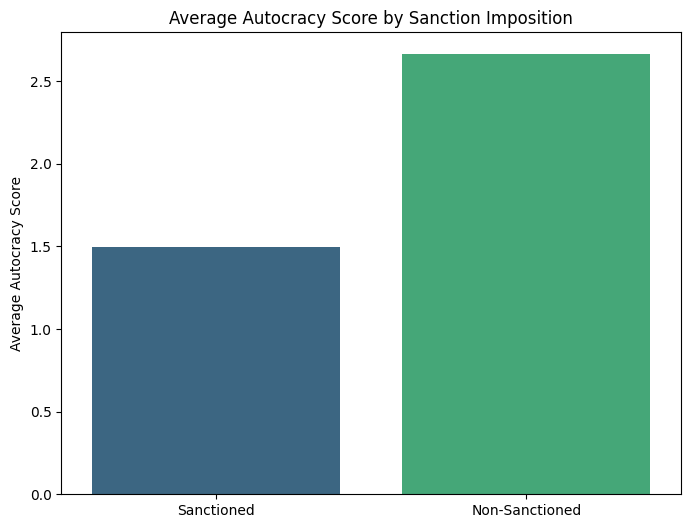

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Assuming df_with_autocracy is your main DataFrame
df_compare = df_with_autocracy.copy()  # Copy so we don't modify the original

sanctioned_df = df_compare[df_compare['imposition'] == 1]
non_sanctioned_df = df_compare[df_compare['imposition'] == 0]

avg_autocracy_sanctioned = sanctioned_df['Autocracy_Score'].mean()
avg_autocracy_non_sanctioned = non_sanctioned_df['Autocracy_Score'].mean()

print("Average Autocracy Score (Sanctioned):", avg_autocracy_sanctioned)
print("Average Autocracy Score (Non-Sanctioned):", avg_autocracy_non_sanctioned)

plt.figure(figsize=(8,6))
sns.barplot(x=['Sanctioned','Non-Sanctioned'], 
            y=[avg_autocracy_sanctioned, avg_autocracy_non_sanctioned], 
            palette='viridis')
plt.ylabel('Average Autocracy Score')
plt.title('Average Autocracy Score by Sanction Imposition')
plt.show()


In [44]:
df_logit = df_with_autocracy.copy()  # Create a copy
df_logit = df_logit.dropna(subset=['Autocracy_Score', 'imposition'])

model = smf.logit('imposition ~ Autocracy_Score', data=df_logit).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.663849
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  958
Model:                          Logit   Df Residuals:                      956
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.001059
Time:                        03:21:31   Log-Likelihood:                -635.97
converged:                       True   LL-Null:                       -636.64
Covariance Type:            nonrobust   LLR p-value:                    0.2455
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4963      0.067      7.363      0.000       0.364       0.628
Autocracy_Scor

In [45]:
# Create a copy of melted_df_auto
melted_df_auto_copy = melted_df_auto.copy()

THRESHOLD = 3
def calculate_regime_duration(group):
    group = group.copy()
    group['Regime_Duration'] = 0
    last_regime_change_year = group.iloc[0]['Year']
    last_value = group.iloc[0]['Value']
    group.iloc[0, group.columns.get_loc('Regime_Duration')] = 1
    
    for i in range(1, len(group)):
        current_value = group.iloc[i]['Value']
        current_year = group.iloc[i]['Year']
        if abs(current_value - last_value) > THRESHOLD:
            last_regime_change_year = current_year
            group.iloc[i, group.columns.get_loc('Regime_Duration')] = 1
        else:
            duration = (current_year - last_regime_change_year) + 1
            group.iloc[i, group.columns.get_loc('Regime_Duration')] = duration
        last_value = current_value
    return group

melted_df_auto_with_duration = melted_df_auto_copy.groupby('Country_Code', group_keys=False).apply(calculate_regime_duration)

# Merge with df_with_autocracy without altering original
df_regime_duration = pd.merge(
    df_with_autocracy.copy(),
    melted_df_auto_with_duration[['Country_Code', 'Year', 'Regime_Duration']],
    left_on=['Country_Code', 'startyear'],
    right_on=['Country_Code', 'Year'],
    how='left'
).drop(columns=['Year'], errors='ignore')

sanctioned_df_dur = df_regime_duration[df_regime_duration['imposition'] == 1]
non_sanctioned_df_dur = df_regime_duration[df_regime_duration['imposition'] == 0]

avg_duration_sanctioned = sanctioned_df_dur['Regime_Duration'].mean()
avg_duration_non_sanctioned = non_sanctioned_df_dur['Regime_Duration'].mean()

print("Average Regime Duration (Sanctioned):", avg_duration_sanctioned)
print("Average Regime Duration (Non-Sanctioned):", avg_duration_non_sanctioned)

# Logistic regression with Regime_Duration
df_logit_duration = df_regime_duration.dropna(subset=['imposition','Autocracy_Score','Regime_Duration'])
model_duration = smf.logit('imposition ~ Autocracy_Score + Regime_Duration', data=df_logit_duration).fit()
print(model_duration.summary())


Average Regime Duration (Sanctioned): 31.672849915682967
Average Regime Duration (Non-Sanctioned): 35.53972602739726
Optimization terminated successfully.
         Current function value: 0.662589
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  958
Model:                          Logit   Df Residuals:                      955
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.002955
Time:                        03:21:41   Log-Likelihood:                -634.76
converged:                       True   LL-Null:                       -636.64
Covariance Type:            nonrobust   LLR p-value:                    0.1524
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\1744407870.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted_df_auto_with_duration = melted_df_auto_copy.groupby('Country_Code', group_keys=False).apply(calculate_regime_duration)


In [52]:
# Create a copy of melted_df_auto
melted_df_auto_copy = melted_df_auto.copy()

THRESHOLD = 0
def calculate_regime_duration(group):
    group = group.copy()
    group['Regime_Duration'] = 0
    last_regime_change_year = group.iloc[0]['Year']
    last_value = group.iloc[0]['Value']
    group.iloc[0, group.columns.get_loc('Regime_Duration')] = 1
    
    for i in range(1, len(group)):
        current_value = group.iloc[i]['Value']
        current_year = group.iloc[i]['Year']
        if abs(current_value - last_value) > THRESHOLD:
            last_regime_change_year = current_year
            group.iloc[i, group.columns.get_loc('Regime_Duration')] = 1
        else:
            duration = (current_year - last_regime_change_year) + 1
            group.iloc[i, group.columns.get_loc('Regime_Duration')] = duration
        last_value = current_value
    return group

melted_df_auto_with_duration = melted_df_auto_copy.groupby('Country_Code', group_keys=False).apply(calculate_regime_duration)

# Merge with df_with_autocracy without altering original
df_regime_duration = pd.merge(
    df_with_autocracy.copy(),
    melted_df_auto_with_duration[['Country_Code', 'Year', 'Regime_Duration']],
    left_on=['Country_Code', 'startyear'],
    right_on=['Country_Code', 'Year'],
    how='left'
).drop(columns=['Year'], errors='ignore')

sanctioned_df_dur = df_regime_duration[df_regime_duration['imposition'] == 1]
non_sanctioned_df_dur = df_regime_duration[df_regime_duration['imposition'] == 0]

avg_duration_sanctioned = sanctioned_df_dur['Regime_Duration'].mean()
avg_duration_non_sanctioned = non_sanctioned_df_dur['Regime_Duration'].mean()

print("Average Regime Duration (Sanctioned):", avg_duration_sanctioned)
print("Average Regime Duration (Non-Sanctioned):", avg_duration_non_sanctioned)

# Logistic regression with Regime_Duration
df_logit_duration = df_regime_duration.dropna(subset=['imposition','Autocracy_Score','Regime_Duration'])
model_duration = smf.logit('imposition ~ Autocracy_Score + Regime_Duration', data=df_logit_duration).fit()
print(model_duration.summary())


Average Regime Duration (Sanctioned): 21.30860033726813
Average Regime Duration (Non-Sanctioned): 23.583561643835615
Optimization terminated successfully.
         Current function value: 0.663286
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  958
Model:                          Logit   Df Residuals:                      955
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.001906
Time:                        03:23:36   Log-Likelihood:                -635.43
converged:                       True   LL-Null:                       -636.64
Covariance Type:            nonrobust   LLR p-value:                    0.2972
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\2185130379.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted_df_auto_with_duration = melted_df_auto_copy.groupby('Country_Code', group_keys=False).apply(calculate_regime_duration)


In [54]:
# Create a copy of melted_df_auto to avoid altering the original
melted_df_auto_delta = melted_df_auto.copy().sort_values(['Country_Code', 'Year'])

def compute_autocracy_delta(group):
    group = group.copy()
    group['Delta_Autocracy_Score'] = group['Value'].diff()
    return group

melted_df_auto_delta = melted_df_auto_delta.groupby('Country_Code', group_keys=False).apply(compute_autocracy_delta)

# Merge onto a copy of df_with_autocracy
df_delta = pd.merge(
    df_with_autocracy.copy(),
    melted_df_auto_delta[['Country_Code', 'Year', 'Delta_Autocracy_Score']],
    left_on=['Country_Code', 'startyear'],
    right_on=['Country_Code', 'Year'],
    how='left'
).drop(columns=['Year'], errors='ignore')

df_delta_logit = df_delta.dropna(subset=['imposition','Delta_Autocracy_Score'])
model_delta = smf.logit('imposition ~ Delta_Autocracy_Score', data=df_delta_logit).fit()
print(model_delta.summary())


Optimization terminated successfully.
         Current function value: 0.664733
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  954
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:               0.0008855
Time:                        03:23:40   Log-Likelihood:                -634.16
converged:                       True   LL-Null:                       -634.72
Covariance Type:            nonrobust   LLR p-value:                    0.2890
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4772      0.067      7.159      0.000       0.347       0.

C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\1993546084.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted_df_auto_delta = melted_df_auto_delta.groupby('Country_Code', group_keys=False).apply(compute_autocracy_delta)


In [55]:
# Use the melted_df_auto_delta from above (already computed delta).
# Create a copy to avoid altering it.
melted_df_auto_lag = melted_df_auto_delta.copy()

df_lag = df_with_autocracy.copy()
df_lag['Year_for_merge'] = df_lag['startyear'] - 1

df_lag_merge = pd.merge(
    df_lag,
    melted_df_auto_lag[['Country_Code', 'Year', 'Delta_Autocracy_Score']],
    left_on=['Country_Code', 'Year_for_merge'],
    right_on=['Country_Code', 'Year'],
    how='left'
).drop(columns=['Year', 'Year_for_merge'], errors='ignore')

df_lag_logit = df_lag_merge.dropna(subset=['imposition','Delta_Autocracy_Score'])
model_lag = smf.logit('imposition ~ Delta_Autocracy_Score', data=df_lag_logit).fit()
print(model_lag.summary())


Optimization terminated successfully.
         Current function value: 0.665270
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  949
Model:                          Logit   Df Residuals:                      947
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:               0.0007678
Time:                        03:23:48   Log-Likelihood:                -631.34
converged:                       True   LL-Null:                       -631.83
Covariance Type:            nonrobust   LLR p-value:                    0.3246
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4737      0.067      7.092      0.000       0.343       0.

In [56]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# 1. Compute Percentage Delta in Autocracy Score

# Create a copy to avoid altering the original melted_df_auto
melted_df_auto_pct = melted_df_auto.copy().sort_values(['Country_Code', 'Year'])

def compute_autocracy_pct_delta(group):
    group = group.copy()
    group['Percentage_Delta_Autocracy'] = np.nan
    group = group.reset_index(drop=True)
    for i in range(1, len(group)):
        prev_value = group.loc[i-1, 'Value']
        curr_value = group.loc[i, 'Value']
        if prev_value != 0:
            pct_change = ((curr_value - prev_value) / abs(prev_value)) * 100
        else:
            # If prev_value is zero or too close to zero, handle carefully
            # Add a small epsilon or handle differently as needed
            epsilon = 0.001
            pct_change = ((curr_value - prev_value) / (abs(prev_value) + epsilon)) * 100
        group.loc[i, 'Percentage_Delta_Autocracy'] = pct_change
    return group

melted_df_auto_pct = melted_df_auto_pct.groupby('Country_Code', group_keys=False).apply(compute_autocracy_pct_delta)

# Now we have a Percentage_Delta_Autocracy column for each Country-Year.
# We need to create multiple lags for this percentage delta.
# For example, create lag_1, lag_2, and lag_3 (1-year, 2-year, 3-year lags).

def create_lags(group, lag_years=[1,2,3]):
    group = group.copy()
    for lag in lag_years:
        group[f'Lag_{lag}_PctDelta'] = group['Percentage_Delta_Autocracy'].shift(lag)
    return group

melted_df_auto_lags = melted_df_auto_pct.groupby('Country_Code', group_keys=False).apply(create_lags, lag_years=[1,2,3])

# melted_df_auto_lags now has columns: Lag_1_PctDelta, Lag_2_PctDelta, Lag_3_PctDelta.

# 2. Merge the lagged percentage deltas onto df_with_autocracy for the startyear
# Instead of overwriting df_with_autocracy, create a copy
df_with_lags = df_with_autocracy.copy()

# We'll merge by matching the startyear of sanctions to the Year in melted_df_auto_lags.
# This gives us the percentage delta from the current year. But we have lags defined in that DF,
# so Lag_1_PctDelta is from startyear-1, Lag_2_PctDelta from startyear-2, etc.

df_with_lags = pd.merge(
    df_with_lags,
    melted_df_auto_lags[['Country_Code', 'Year', 'Lag_1_PctDelta', 'Lag_2_PctDelta', 'Lag_3_PctDelta']],
    left_on=['Country_Code', 'startyear'],
    right_on=['Country_Code', 'Year'],
    how='left'
).drop(columns=['Year'], errors='ignore')

# Now df_with_lags has Lag_1_PctDelta, Lag_2_PctDelta, Lag_3_PctDelta columns that correspond to 
# changes in autocracy score from previous years.

# 3. Run a logistic regression using multiple lags.
# We must drop rows with NaN in any of these lag columns.
analysis_df = df_with_lags.dropna(subset=['imposition', 'Lag_1_PctDelta', 'Lag_2_PctDelta', 'Lag_3_PctDelta'])

# Example logistic model including all three lags:
model_formula = 'imposition ~ Lag_1_PctDelta + Lag_2_PctDelta + Lag_3_PctDelta'

model = smf.logit(model_formula, data=analysis_df).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.666573
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  939
Model:                          Logit   Df Residuals:                      935
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.001663
Time:                        03:26:26   Log-Likelihood:                -625.91
converged:                       True   LL-Null:                       -626.95
Covariance Type:            nonrobust   LLR p-value:                    0.5549
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4536      0.067      6.766      0.000       0.322       0.585
Lag_1_PctDelta  3

C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\1592105978.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted_df_auto_pct = melted_df_auto_pct.groupby('Country_Code', group_keys=False).apply(compute_autocracy_pct_delta)
C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\1592105978.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted_df_auto_lags = melted_df_auto_pct.groupby('Country_Code', 

In [58]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Example: Extracting Institutionalized Autocracy Index from the Polity dataset
# Adjust the indicator string to match exactly what is in your dataset
indicator_name = 'Polity database: Institutionalized Autocracy Index'

# 1. Subset the Polity dataset for the chosen indicator
inst_autocracy_data = plty[plty['Indicator'] == indicator_name].copy()

# 2. Identify all year columns
year_columns = [col for col in inst_autocracy_data.columns if col.isdigit()]

# 3. Melt the data from wide to long format
melted_df_auto_inst = inst_autocracy_data.melt(
    id_vars=['Economy Name'], 
    value_vars=year_columns,
    var_name='Year', 
    value_name='Inst_Auto_Index'
)

# Convert Year to numeric
melted_df_auto_inst['Year'] = pd.to_numeric(melted_df_auto_inst['Year'], errors='coerce')

# Drop rows with missing years or values
melted_df_auto_inst.dropna(subset=['Year','Inst_Auto_Index'], inplace=True)

# Convert 'Year' to int
melted_df_auto_inst['Year'] = melted_df_auto_inst['Year'].astype(int)

# 4. Filter only for years after 1950
melted_df_auto_inst = melted_df_auto_inst[melted_df_auto_inst['Year'] > 1950]

# Standardize and merge country codes as before
def safe_upper_strip(x):
    if isinstance(x, str):
        return x.upper().strip()
    else:
        return np.nan

melted_df_auto_inst['Economy_Name_standardized'] = melted_df_auto_inst['Economy Name'].apply(safe_upper_strip)
cow['StateNme_standardized'] = cow['StateNme'].apply(safe_upper_strip)

# Create mapping from StateNme to CCode
country_mapping = dict(zip(cow['StateNme_standardized'], cow['CCode']))
melted_df_auto_inst['Country_Code'] = melted_df_auto_inst['Economy_Name_standardized'].map(country_mapping)

# Drop rows without a Country_Code
melted_df_auto_inst.dropna(subset=['Country_Code'], inplace=True)
melted_df_auto_inst['Country_Code'] = melted_df_auto_inst['Country_Code'].astype(int)

# Now `melted_df_auto_inst` is defined and filtered for post-1950 years.
# You can proceed with computing pct deltas and lags for `Inst_Auto_Index` similarly:

melted_df_auto_inst = melted_df_auto_inst.sort_values(['Country_Code', 'Year'])

def compute_pct_delta(group, value_col='Inst_Auto_Index'):
    group = group.copy()
    group[f'PctDelta_{value_col}'] = np.nan
    group.reset_index(drop=True, inplace=True)
    for i in range(1, len(group)):
        prev_value = group.loc[i-1, value_col]
        curr_value = group.loc[i, value_col]
        # Handle zero or near zero denominators
        epsilon = 0.001
        denominator = abs(prev_value) if abs(prev_value) > 0 else epsilon
        pct_change = ((curr_value - prev_value) / denominator) * 100
        group.loc[i, f'PctDelta_{value_col}'] = pct_change
    return group

melted_df_auto_inst = melted_df_auto_inst.groupby('Country_Code', group_keys=False).apply(compute_pct_delta, value_col='Inst_Auto_Index')

def create_lags(group, base_col, lag_years=[1,2,3]):
    group = group.copy()
    for lag in lag_years:
        group[f'{base_col}_Lag_{lag}'] = group[f'PctDelta_{base_col}'].shift(lag)
    return group

melted_df_auto_inst = melted_df_auto_inst.groupby('Country_Code', group_keys=False).apply(create_lags, base_col='Inst_Auto_Index', lag_years=[1,2,3])

# Merge with your main sanctions dataset (again, create a copy if you don't want to overwrite)
df_with_inst_lags = df_with_autocracy.copy()

df_with_inst_lags = pd.merge(
    df_with_inst_lags,
    melted_df_auto_inst[['Country_Code','Year','PctDelta_Inst_Auto_Index','Inst_Auto_Index_Lag_1','Inst_Auto_Index_Lag_2','Inst_Auto_Index_Lag_3']],
    left_on=['Country_Code','startyear'],
    right_on=['Country_Code','Year'],
    how='left'
).drop(columns=['Year'], errors='ignore')

analysis_df_inst = df_with_inst_lags.dropna(subset=['imposition','Inst_Auto_Index_Lag_1','Inst_Auto_Index_Lag_2','Inst_Auto_Index_Lag_3'])

model_formula_inst = 'imposition ~ Inst_Auto_Index_Lag_1 + Inst_Auto_Index_Lag_2 + Inst_Auto_Index_Lag_3'
model_inst = smf.logit(model_formula_inst, data=analysis_df_inst).fit()
print(model_inst.summary())


Optimization terminated successfully.
         Current function value: 0.670455
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  867
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.001102
Time:                        03:32:54   Log-Likelihood:                -581.28
converged:                       True   LL-Null:                       -581.93
Covariance Type:            nonrobust   LLR p-value:                    0.7334
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4178      0.070      5.991      0.000       0.281       0.

C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\1968527027.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted_df_auto_inst = melted_df_auto_inst.groupby('Country_Code', group_keys=False).apply(compute_pct_delta, value_col='Inst_Auto_Index')
C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\1968527027.py:80: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted_df_auto_inst = melted_df_auto_inst.gr

In [65]:
import pandas as pd
import numpy as np
import re
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#############################
# Configuration
#############################

START_YEAR = 1951     # Only consider data after this year
LAG_YEARS = [1, 2, 3] # Which lags to create
ALL_INDICATORS = plty['Indicator'].unique()  # Process all available indicators
ALL_INDICATORS = pd.Series(ALL_INDICATORS).drop_duplicates().values  # remove duplicates if any

#############################
# Helper Functions
#############################

def safe_upper_strip(x):
    if isinstance(x, str):
        return x.upper().strip()
    return np.nan

def create_safe_column_name(ind_name):
    """
    Generate a short, clean column name from the full indicator name.
    Removes 'Polity database:' prefix, non-alphanumerics replaced with underscores.
    """
    base = ind_name.replace("Polity database:", "").strip()
    base = re.sub('[^0-9a-zA-Z]+', '_', base)
    base = base.strip('_')
    return base[:30]  # Truncate to avoid overly long column names

def compute_pct_delta(group, value_col):
    """
    Compute year-on-year percentage change of an indicator for a single country group.
    """
    group = group.copy()
    pct_col = f'PctDelta_{value_col}'
    group[pct_col] = np.nan
    group.reset_index(drop=True, inplace=True)

    for i in range(1, len(group)):
        prev_val = group.loc[i-1, value_col]
        curr_val = group.loc[i, value_col]
        epsilon = 0.001
        denominator = abs(prev_val) if abs(prev_val) > 0 else epsilon
        pct_change = ((curr_val - prev_val) / denominator) * 100
        group.loc[i, pct_col] = pct_change

    return group

def prepare_indicator(plty, cow, indicator_name, base_col_name, start_year=START_YEAR, lag_years=LAG_YEARS):
    """
    Prepare a single indicator:
    - Filter by indicator_name
    - Melt to long format
    - Keep years >= start_year
    - Merge with COW codes
    - Compute percentage deltas
    - Create lag columns
    Returns a DataFrame with Country_Code, Year, PctDelta, and lagged columns.
    """

    # Subset indicator data
    indicator_df = plty[plty['Indicator'] == indicator_name].copy()
    year_columns = [c for c in indicator_df.columns if c.isdigit()]

    # Melt from wide to long
    melted = indicator_df.melt(
        id_vars=['Economy Name'],
        value_vars=year_columns,
        var_name='Year',
        value_name=base_col_name
    )
    melted['Year'] = pd.to_numeric(melted['Year'], errors='coerce')
    melted[base_col_name] = pd.to_numeric(melted[base_col_name], errors='coerce')
    melted.dropna(subset=['Year', base_col_name], inplace=True)
    melted['Year'] = melted['Year'].astype(int)

    # Filter by year
    melted = melted[melted['Year'] >= start_year]

    # Standardize country names and merge CCode
    melted['Economy_Name_standardized'] = melted['Economy Name'].apply(safe_upper_strip)
    cow['StateNme_standardized'] = cow['StateNme'].apply(safe_upper_strip)
    country_mapping = dict(zip(cow['StateNme_standardized'], cow['CCode']))
    melted['Country_Code'] = melted['Economy_Name_standardized'].map(country_mapping)
    melted.dropna(subset=['Country_Code'], inplace=True)
    melted['Country_Code'] = melted['Country_Code'].astype(int)
    melted = melted.sort_values(['Country_Code','Year'])

    # Compute percentage delta
    melted = melted.groupby('Country_Code', group_keys=False).apply(compute_pct_delta, value_col=base_col_name)

    # Create lag columns
    pct_col = f'PctDelta_{base_col_name}'
    for lag in lag_years:
        melted[f'{pct_col}_Lag_{lag}'] = melted[pct_col].shift(lag)

    return melted[['Country_Code', 'Year', pct_col] + [f'{pct_col}_Lag_{lag}' for lag in lag_years]]


#############################
# Main Processing: All Indicators
#############################

df_multi = df_with_autocracy.copy()
all_lag_vars = []

for ind_name in ALL_INDICATORS:
    base_col = create_safe_column_name(ind_name)
    prepared = prepare_indicator(plty, cow, ind_name, base_col)
    df_multi = pd.merge(
        df_multi,
        prepared,
        left_on=['Country_Code','startyear'],
        right_on=['Country_Code','Year'],
        how='left'
    ).drop(columns=['Year'], errors='ignore')

    pct_col = f'PctDelta_{base_col}'
    for lag in LAG_YEARS:
        all_lag_vars.append(f'{pct_col}_Lag_{lag}')

# Drop columns that are constant or nearly constant
for col in all_lag_vars:
    if col in df_multi and (df_multi[col].nunique() <= 1):
        df_multi.drop(columns=[col], inplace=True)
        all_lag_vars.remove(col)

# After this, check if there are any lag vars left
if not all_lag_vars:
    print("No usable lag variables found after filtering. Cannot run regression.")
else:
    analysis_df = df_multi.dropna(subset=['imposition'] + all_lag_vars)

    # If still facing singularity issues with statsmodels, try fewer lags or fewer indicators.
    # For demonstration, try a simpler model with just Lag_1:
    # filtered_vars = [v for v in all_lag_vars if "_Lag_1" in v]
    # analysis_df = df_multi.dropna(subset=['imposition'] + filtered_vars)
    # model_formula = 'imposition ~ ' + ' + '.join(filtered_vars)

    # For now, let's just try all:
    model_formula = 'imposition ~ ' + ' + '.join(all_lag_vars)

    # Attempt fitting with statsmodels
    try:
        model = smf.logit(model_formula, data=analysis_df).fit()
        print(model.summary())
    except Exception as e:
        print("Statsmodels logistic regression failed due to:", e)
        print("Trying penalized logistic regression with scikit-learn...")

        # Use scikit-learn's logistic regression with L2 regularization to handle singularities
        X = analysis_df[all_lag_vars]
        y = analysis_df['imposition']

        # Scale features to help with numerical stability
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Increase max_iter to ensure convergence
        logit_ridge = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
        logit_ridge.fit(X_train, y_train)

C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\2035687713.py:97: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted = melted.groupby('Country_Code', group_keys=False).apply(compute_pct_delta, value_col=base_col_name)
C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\2035687713.py:97: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melted = melted.groupby('Country_Code', group_keys=False).apply(compute_pc

         Current function value: inf
         Iterations: 35
Statsmodels logistic regression failed due to: Singular matrix
Trying penalized logistic regression with scikit-learn...


In [64]:
from sklearn.metrics import classification_report, roc_auc_score


In [66]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = logit_ridge.predict(X_test)
y_pred_prob = logit_ridge.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))


              precision    recall  f1-score   support

           0       0.25      0.02      0.03        62
           1       0.64      0.97      0.77       110

    accuracy                           0.63       172
   macro avg       0.44      0.49      0.40       172
weighted avg       0.50      0.63      0.50       172

ROC-AUC: 0.5149560117302052


## 2

In [68]:
import statsmodels.formula.api as smf

# Ensure df_with_autocracy exists with 'imposition' and 'Autocracy_Score' columns.

# 1. Create the binary dependent variable 'threat_occurred'
# If imposition is 0 or 1, that means at least a threat occurred.
df_with_autocracy['threat_occurred'] = 0
df_with_autocracy.loc[df_with_autocracy['imposition'].isin([0, 1]), 'threat_occurred'] = 1

# 2. Drop rows with missing values for critical variables
df_analysis = df_with_autocracy.dropna(subset=['Autocracy_Score', 'threat_occurred'])

# 3. Define the model formula
# Start simple with just Autocracy_Score. Add more controls as available.
model_formula = 'threat_occurred ~ Autocracy_Score'

# 4. Fit a logistic regression model
model = smf.logit(model_formula, data=df_analysis).fit()

# 5. Review the model results
print(model.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        threat_occurred   No. Observations:                  958
Model:                          Logit   Df Residuals:                      956
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                     inf
Time:                        04:05:32   Log-Likelihood:            -9.6594e-09
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          25.3132   1.02e+04      0.002      0.998   -1.99e+04       2e+04
Autocracy_Score     0.0067    538.669   1.24e-05  

c:\Users\maxla\OneDrive\Documents\GitHub\RCM\EconCoerFinal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\maxla\OneDrive\Documents\GitHub\RCM\EconCoerFinal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\maxla\OneDrive\Documents\GitHub\RCM\EconCoerFinal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\maxla\OneDrive\Documents\GitHub\RCM\EconCoerFinal\venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning:

In [71]:
import statsmodels.formula.api as smf

# We assume df_with_autocracy is already in memory
# and contains 'imposition' and 'Autocracy_Score'.
# 'imposition' should be 0 if only a threat was made and 1 if sanctions were imposed.

# 1. Filter to rows where imposition is either 0 or 1, dropping cases with missing values
df_analysis = df_with_autocracy.dropna(subset=['Autocracy_Score', 'imposition'])
df_analysis = df_analysis[df_analysis['imposition'].isin([0,1])]

# Check the distribution
print("Distribution of imposition:\n", df_analysis['imposition'].value_counts())

# 2. Fit a logistic regression model to see if Autocracy_Score predicts going from threat to imposition
model_formula = 'imposition ~ Autocracy_Score'
model = smf.logit(model_formula, data=df_analysis).fit()
print(model.summary())


Distribution of imposition:
 imposition
1    593
0    365
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 0.663849
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  958
Model:                          Logit   Df Residuals:                      956
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.001059
Time:                        04:16:46   Log-Likelihood:                -635.97
converged:                       True   LL-Null:                       -636.64
Covariance Type:            nonrobust   LLR p-value:                    0.2455
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept     

Data points after filtering: 930
Optimization terminated successfully.
         Current function value: 0.665089
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  930
Model:                          Logit   Df Residuals:                      928
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:               0.0004921
Time:                        04:18:09   Log-Likelihood:                -618.53
converged:                       True   LL-Null:                       -618.84
Covariance Type:            nonrobust   LLR p-value:                    0.4351
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5105      0.080      6.398      0.000      

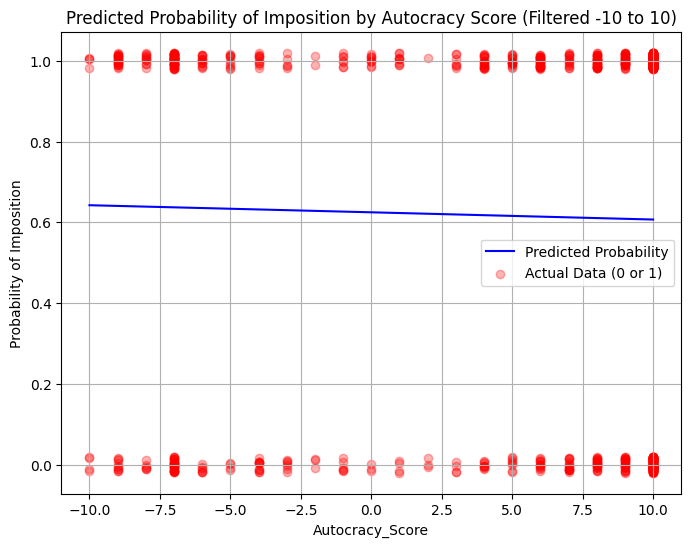

In [74]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Filter the dataset to retain only rows where Autocracy_Score is within [-10, 10]
df_analysis = df_with_autocracy.dropna(subset=['Autocracy_Score', 'imposition'])
df_analysis = df_analysis[df_analysis['imposition'].isin([0,1])]
df_analysis = df_analysis[(df_analysis['Autocracy_Score'] >= -10) & (df_analysis['Autocracy_Score'] <= 10)]

# Check that we still have data after filtering
print("Data points after filtering:", len(df_analysis))

# 2. Fit the logistic regression model
model_formula = 'imposition ~ Autocracy_Score'
model = smf.logit(model_formula, data=df_analysis).fit()
print(model.summary())

# 3. Create a range of Autocracy_Score values for prediction within the filtered range
auto_min = df_analysis['Autocracy_Score'].min()
auto_max = df_analysis['Autocracy_Score'].max()
auto_range = np.linspace(auto_min, auto_max, 100)

predict_df = pd.DataFrame({'Autocracy_Score': auto_range})
predict_df['pred_prob'] = model.predict(predict_df)

# 4. Plot the predicted probabilities
plt.figure(figsize=(8,6))
plt.plot(predict_df['Autocracy_Score'], predict_df['pred_prob'], color='blue', label='Predicted Probability')

# Jitter y-values for actual data to visualize
y_jitter = np.random.uniform(-0.02, 0.02, size=len(df_analysis))
plt.scatter(df_analysis['Autocracy_Score'], df_analysis['imposition'] + y_jitter,
            alpha=0.3, color='red', label='Actual Data (0 or 1)')

plt.xlabel('Autocracy_Score')
plt.ylabel('Probability of Imposition')
plt.title('Predicted Probability of Imposition by Autocracy Score (Filtered -10 to 10)')
plt.legend()
plt.grid(True)
plt.show()


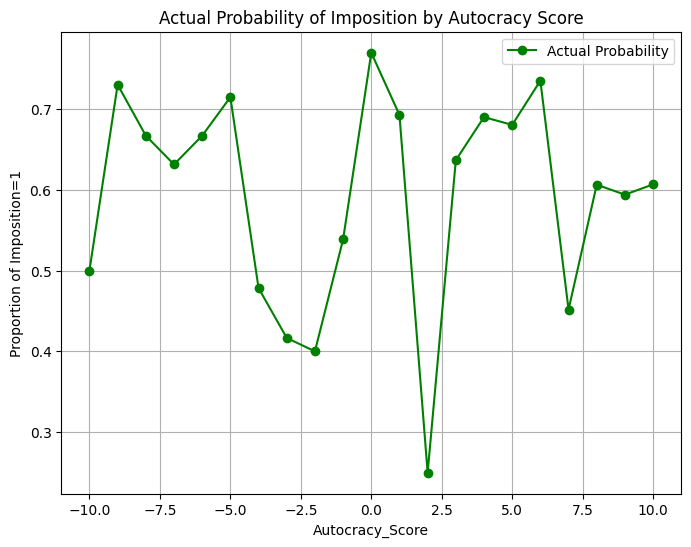

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Start from df_analysis as previously defined:
# Ensure df_with_autocracy, Autocracy_Score between -10 and 10, and imposition in {0,1} is done
df_analysis = df_with_autocracy.dropna(subset=['Autocracy_Score', 'imposition'])
df_analysis = df_analysis[df_analysis['imposition'].isin([0,1])]
df_analysis = df_analysis[(df_analysis['Autocracy_Score'] >= -10) & (df_analysis['Autocracy_Score'] <= 10)]

# Group by Autocracy_Score and compute the proportion of imposition=1
grouped = df_analysis.groupby('Autocracy_Score')['imposition'].mean().reset_index()

# 'imposition' now represents the actual fraction of cases with imposition=1 at each Autocracy_Score
# Plot these empirical probabilities
plt.figure(figsize=(8,6))
plt.plot(grouped['Autocracy_Score'], grouped['imposition'], marker='o', linestyle='-', color='green', label='Actual Probability')

plt.xlabel('Autocracy_Score')
plt.ylabel('Proportion of Imposition=1')
plt.title('Actual Probability of Imposition by Autocracy Score')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\maxla\AppData\Local\Temp\ipykernel_44296\306472654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_bin = df_analysis.groupby('score_bin')['imposition'].mean().reset_index()


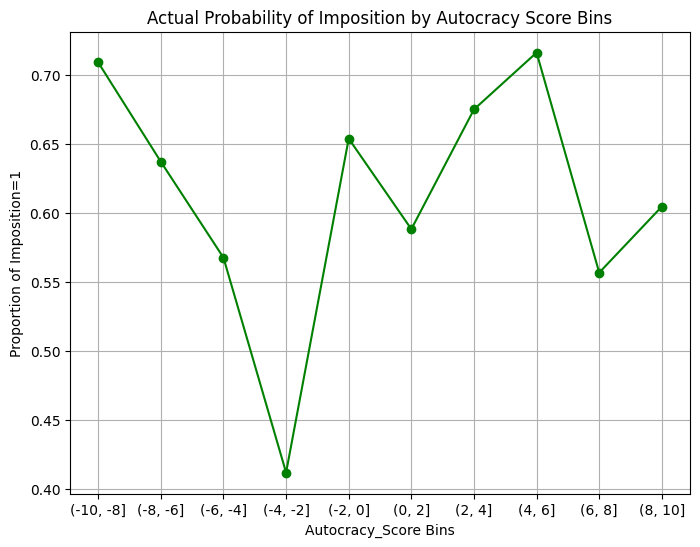

In [76]:
# Optional: Binning approach if Autocracy_Score is continuous with few repeats
df_analysis['score_bin'] = pd.cut(df_analysis['Autocracy_Score'], bins=np.arange(-10, 11, 2))
grouped_bin = df_analysis.groupby('score_bin')['imposition'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.plot(grouped_bin['score_bin'].astype(str), grouped_bin['imposition'], marker='o', color='green')
plt.xlabel('Autocracy_Score Bins')
plt.ylabel('Proportion of Imposition=1')
plt.title('Actual Probability of Imposition by Autocracy Score Bins')
plt.grid(True)
plt.show()


In [83]:
# Filter the dataset to include only imposition=0 and imposition=1
df_analysis = df_with_autocracy[df_with_autocracy['imposition'].isin([0, 1])]

# Check the distribution of the dependent variable
print("Distribution of imposition:\n", df_analysis['imposition'].value_counts())

Distribution of imposition:
 imposition
1    500
0    317
Name: count, dtype: int64


In [80]:
df_with_autocracy['delta_autocracy'] = df_with_autocracy.groupby('Country_Code')['Autocracy_Score'].diff()
# Drop the first year for each country where delta_autocracy is NaN
df_with_autocracy = df_with_autocracy.dropna(subset=['delta_autocracy'])

# Optional: Filter Autocracy_Score within -10 to 10
df_with_autocracy = df_with_autocracy[(df_with_autocracy['Autocracy_Score'] >= -10) & 
                                      (df_with_autocracy['Autocracy_Score'] <= 10)]

In [82]:
df_with_autocracy

,caseid,startmonth,startday,startyear,endmonth,endday,endyear,ongoingasofmonth,ongoingasofday,ongoingasofyear,...,sendereconomiccostsfigure,sendereconomiccostscurrency,sendereconomiccostsyear,finaloutcome,settlementnaturesender,settlementnaturetarget,Country_Code,Autocracy_Score,threat_occurred,delta_autocracy
10,1947090801,9.0,8.0,1947,5.0,31.0,1949.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,8.0,4.0,200,10.0,1,0.0
24,1948012903,1.0,29.0,1948,NaN,NaN,NaN,2.0,5.0,1948.0,...,NaN,NaN,NaN,NaN,NaN,NaN,230,-7.0,1,0.0
27,1948032502,3.0,25.0,1948,5.0,12.0,1949.0,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,1.0,10.0,200,10.0,1,0.0
34,1949011403,1.0,14.0,1949,2.0,21.0,1949.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,10.0,8.0,385,10.0,1,0.0
35,1949033001,3.0,30.0,1949,11.0,15.0,1950.0,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,9.0,6.0,230,-7.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2005052001,5.0,20.0,2005,6.0,25.0,2007.0,NaN,NaN,NaN,...,NaN,NaN,NaN,7.0,6.0,4.0,820,3.0,1,0.0
1407,2005060701,6.0,7.0,2005,NaN,NaN,NaN,8.0,12.0,2011.0,...,NaN,NaN,NaN,4.0,6.0,5.0,325,10.0,1,0.0
1409,2005071401,7.0,14.0,2005,8.0,2.0,2005.0,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,3.0,7.0,660,6.0,1,72.0
1410,2005100601,10.0,6.0,2005,6.0,17.0,2010.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,2.0,8.0,140,8.0,1,0.0


In [84]:
# Define the logistic regression formula
model_formula = 'imposition ~ delta_autocracy'

# Fit the logistic regression model
model = smf.logit(formula=model_formula, data=df_analysis).fit()

# Display the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.667447
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             imposition   No. Observations:                  817
Model:                          Logit   Df Residuals:                      815
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:               0.0006000
Time:                        04:39:33   Log-Likelihood:                -545.30
converged:                       True   LL-Null:                       -545.63
Covariance Type:            nonrobust   LLR p-value:                    0.4184
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4463      0.073      6.141      0.000       0.304       0.589
delta_autocrac

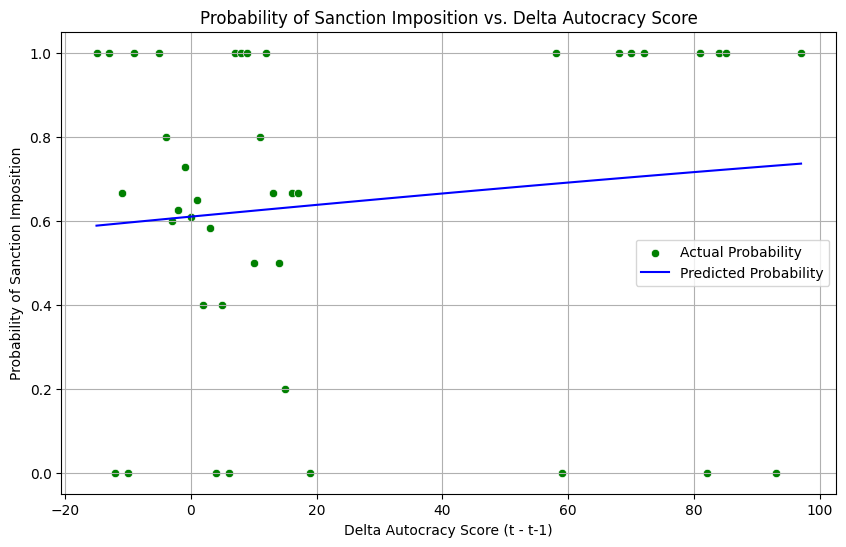

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean imposition for each delta_autocracy value
grouped = df_analysis.groupby('delta_autocracy')['imposition'].mean().reset_index()

# Plot the actual observed probabilities
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delta_autocracy', y='imposition', data=grouped, color='green', label='Actual Probability')

# Create a range of delta_autocracy values for prediction
delta_min = df_analysis['delta_autocracy'].min()
delta_max = df_analysis['delta_autocracy'].max()
delta_range = np.linspace(delta_min, delta_max, 100)

# Create a DataFrame for prediction
predict_df = pd.DataFrame({'delta_autocracy': delta_range})

# Get predicted probabilities from the model
predict_df['pred_prob'] = model.predict(predict_df)

# Plot the model's predicted probabilities
sns.lineplot(x='delta_autocracy', y='pred_prob', data=predict_df, color='blue', label='Predicted Probability')

plt.xlabel('Delta Autocracy Score (t - t-1)')
plt.ylabel('Probability of Sanction Imposition')
plt.title('Probability of Sanction Imposition vs. Delta Autocracy Score')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
df_analysis

,caseid,startmonth,startday,startyear,endmonth,endday,endyear,ongoingasofmonth,ongoingasofday,ongoingasofyear,...,sendereconomiccostsfigure,sendereconomiccostscurrency,sendereconomiccostsyear,finaloutcome,settlementnaturesender,settlementnaturetarget,Country_Code,Autocracy_Score,threat_occurred,delta_autocracy
10,1947090801,9.0,8.0,1947,5.0,31.0,1949.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,8.0,4.0,200,10.0,1,0.0
24,1948012903,1.0,29.0,1948,NaN,NaN,NaN,2.0,5.0,1948.0,...,NaN,NaN,NaN,NaN,NaN,NaN,230,-7.0,1,0.0
27,1948032502,3.0,25.0,1948,5.0,12.0,1949.0,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,1.0,10.0,200,10.0,1,0.0
34,1949011403,1.0,14.0,1949,2.0,21.0,1949.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,10.0,8.0,385,10.0,1,0.0
35,1949033001,3.0,30.0,1949,11.0,15.0,1950.0,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,9.0,6.0,230,-7.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2005052001,5.0,20.0,2005,6.0,25.0,2007.0,NaN,NaN,NaN,...,NaN,NaN,NaN,7.0,6.0,4.0,820,3.0,1,0.0
1407,2005060701,6.0,7.0,2005,NaN,NaN,NaN,8.0,12.0,2011.0,...,NaN,NaN,NaN,4.0,6.0,5.0,325,10.0,1,0.0
1409,2005071401,7.0,14.0,2005,8.0,2.0,2005.0,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,3.0,7.0,660,6.0,1,72.0
1410,2005100601,10.0,6.0,2005,6.0,17.0,2010.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,2.0,8.0,140,8.0,1,0.0


## 3

2. Descriptive Analysis
Begin with a broad overview:

Trends Over Time: Plot average autocracy scores of sanctioned states over time to see if sanctioning patterns correlate with regime type shifts.
Regional/Temporal Variation: Check if certain periods (e.g., Cold War vs. post-Cold War) show different sanction outcomes against autocratic regimes.
Sanction Frequency vs. Autocracy Level: Are more autocratic states targeted more frequently, or differently, than less autocratic states? This provides context before more sophisticated analysis.